In [1]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.table import Table

flux1, fluxerr1, x_pos1, y_pos1 = np.loadtxt('no smoothing.csv', unpack=True, delimiter=',', usecols=(0,1,2,3))
flux2, fluxerr2, x_pos2, y_pos2 = np.loadtxt('quartic.csv', unpack=True, delimiter=',', usecols=(0,1,2,3))
flux3, fluxerr3, x_pos3, y_pos3 = np.loadtxt('quadratic.csv', unpack=True, delimiter=',', usecols=(0,1,2,3))

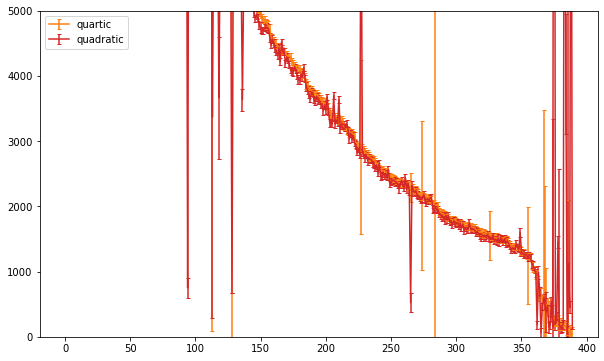

In [25]:
c = 0
stars = np.zeros((5, len(x_pos2)))
for i in range(x_pos2.size):
    dx = x_pos2[i] - x_pos3
    dy = y_pos2[i] - y_pos3
    distances = np.abs(np.sqrt((dx)**2 + (dy)**2))
    j = np.where(distances==np.min(distances))[0]
    if distances[j] < 2:
        stars[0][c] = c
        stars[1][c] = flux2[i]
        stars[2][c] = flux3[j]
        stars[3][c] = fluxerr2[i]
        stars[4][c] = fluxerr3[j]
        c += 1
stars = stars[0:5, 0:c]

fig = plt.figure(figsize=(10, 6))
plt.errorbar(stars[0], stars[1], yerr=stars[3], color='C1', capsize=2, label='quartic')
plt.errorbar(stars[0], stars[2], yerr=stars[4], color='C3', capsize=2, label='quadratic')
plt.legend()
plt.ylim(0, 5000)
plt.show()

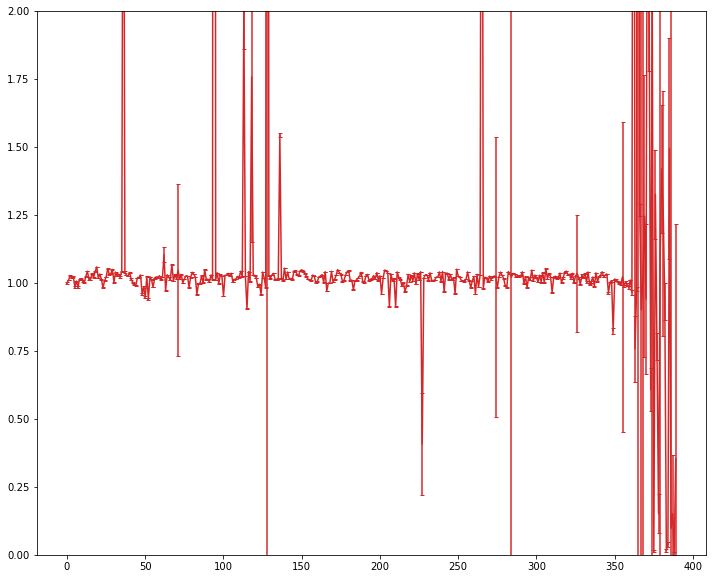

In [23]:
def div(f1, f2):
    return f1 / f2
def prop(f1, ferr1, f2, ferr2):
    f = ((f1/f2)**2 *((ferr1/f1)**2 + (ferr2/f2)**2 - 2*ferr1*ferr2/(f1*f2)))**(1/2)
    return f
flux_div = []
err_prop = []
for i in range(len(stars[0])):
    f_d = div(f1=stars[1][i], f2=stars[2][i])
    e_p = prop(f1=stars[1][i], ferr1=stars[3][i], f2=stars[2][i], ferr2=stars[4][i])
    flux_div.append(f_d)
    err_prop.append(e_p)

fig = plt.figure(figsize=(12, 10))
plt.errorbar(stars[0], flux_div, yerr=err_prop, color='C3', capsize=2, label='f_quart / f_quad')
plt.ylim(0, 2)
plt.show()